In [100]:
import numpy as np
from scipy.stats import norm, multivariate_normal
import math
import matplotlib.pyplot as plt
from numpy.random import normal

In [101]:
mu, var = 0, 0.04
m, c = 0.5, -0.3
x = np.linspace(-1, 1,10)
beta = 1/var
sigma = math.sqrt(var)

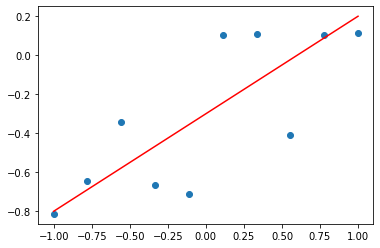

In [102]:
arr = []
for i in x:
    arr.append( -0.3 + 0.5 * i + normal(mu, sigma))
plt.scatter(x, arr)
plt.plot(x, -0.3 + 0.5 * x, c="red")

In [103]:
def mean(w0, w1, x_i):
  y_i = w0 + w1*x_i
  return y_i

In [104]:
def gaus(x,y,w0, w1):
  const = math.sqrt(np.pi*2) * sigma 
  return  const  *  np.exp( -0.5  *  ( ( y - mean( w0, w1, x )) / sigma) **2 )

In [105]:
def posterior_sample(s0, m0, phi, beta, k):
    s0Inv = np.linalg.inv(s0)
    Sn = np.linalg.inv(s0Inv + beta * phi.T@phi)
    inner_term = s0Inv@(m0.reshape((2, 1))) + beta * phi.T * k
    Mn = Sn@inner_term
    return Mn.reshape((1, 2))[0], Sn

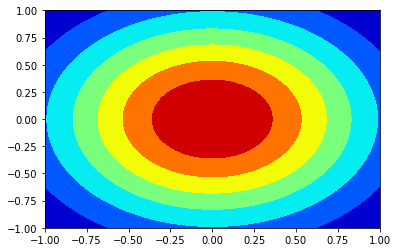

In [106]:
w0, w1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
prior = multivariate_normal([0, 0], [[0.5, 0], [0, 0.5]])
plt.contourf(w0, w1, prior.pdf(np.dstack((w0, w1))), cmap="jet")

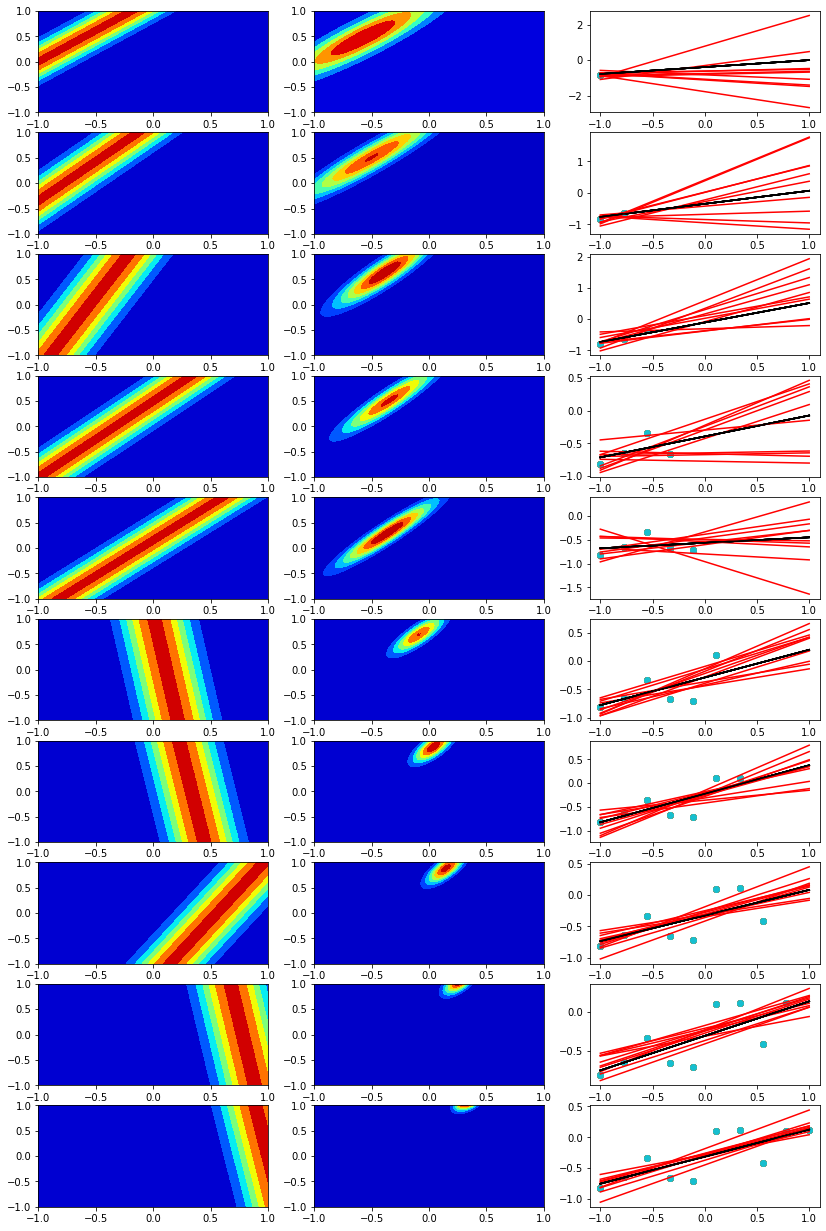

In [111]:
fig, axs = plt.subplots(10, 3, figsize=(14, 22))
count = 0
m0, s0 = np.array([0, 0]), np.array([[0.5, 0], [0, 0.5]])
x_add, y_add = [], []

for i, j in zip(x, arr):
    mle = gaus(j, i, w0, w1)
    posterior = prior * mle
    prior = posterior
    phi = np.array([1, i]).reshape((1, 2))
    m0, s0 = posterior_sample(s0, m0, phi, beta, j)
    dist = multivariate_normal.rvs(m0, s0, 10)
    x_add.append(i)
    y_add.append(j)
    
    axs[count, 0].contourf(w0, w1, mle, cmap="jet")
    axs[count, 1].contourf(w0, w1, posterior, cmap="jet")
    for lines in dist:
        axs[count, 2].plot(x, lines[0] + lines[1] * x, c="red")
        axs[count, 2].plot(x, m0[0] + m0[1] * x, c="black")
        axs[count, 2].scatter(x_add, y_add)
    count += 1

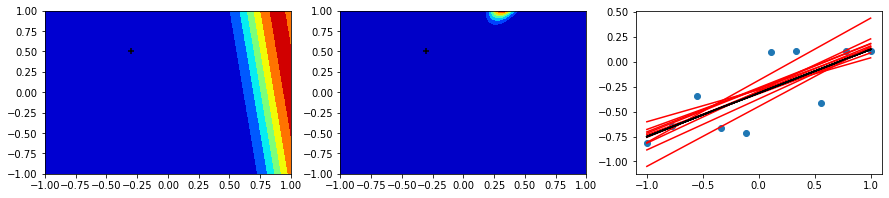

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
axes[0].contourf(w0, w1, mle, cmap="jet")
axes[0].scatter(-0.3, 0.5, c="black", marker="+")
axes[1].contourf(w0, w1, posterior, cmap="jet")
axes[1].scatter(-0.3, 0.5, c="black", marker="+")
for lines in dist:
    axes[2].plot(x, lines[0] + lines[1] * x, c="red")
    axes[2].plot(x, m0[0] + m0[1] * x, c="black")
axes[2].scatter(x_add, y_add)
fig.savefig("figure-2")